# Overview:
  This is a 3 part series in which I will walk through a dataset analysing it and then at the end do predictive modelling.
  
  I recommend to follow the parts in sequential order

# Part 1, Exploratory Data Analysis(EDA):
This part consists of summary statistics of data but the major focus will be on EDA where we extract meaning/information from data using plots and report important insights about data. This part is more about data analysis and business intelligence(BI).

# Part 2, Statistical Analysis:
In this part we will do many statistical hypothesis testing, apply estimation statistics and interpret the results we get. We will also validate this with the findings from part one. We will apply both parametric and non-parametric tests. We will report all the important insights we get in this part. This part is all about data science requires statistical background.

# Part 3, Predictive Modelling:
In this part we will predict some response using predictors. This part is all about machine learning.

# Data Description
The data we are using for EDA is the "auto mpg" dataset taken from seaborn library.

Information regarding data

    Title:Auto-Mpg Data

   Number of Instances: 398

   Number of Attributes:9 including the class attribute

   Attribute Information:

1. mpg:           continuous
2. cylinders:     multi-valued discrete
3. displacement:  continuous
4. horsepower:    continuous
5. weight:        continuous
6. acceleration:  continuous
7. model year:    multi-valued discrete
8. origin:        multi-valued discrete
9. car name:      string (unique for each instance)

All the attributes are self-explanatory.

This data is not complex and is good for analysis as it has a nice blend of both categorical and numerical attributes.

data source

This is part 1 ie., EDA. We won't stretch this part long and do following things in sequential manner.

Preprocess the data, this includes dealing with missing values, duplicate data if any and then align the data.
EDA on categorical attributes, this includes analysing their distributions and relations with other cat. attributes.
EDA on numerical attributes, this includes analysing their distributions and relations with other num. attributes.
Then we will analyse the relation b/w num. & cat. attributes.
I make use of seaborn heavily throughout the notebook, so it is also a good goto notebook for those who are looking for EDA using seaborn.

In [43]:
# first import all necessary libraries
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# Loading dataset from seaborn library
df=sns.load_dataset('mpg')

In [45]:
# so now the data is in rectangular form with 398 entries each having 9 distinct properties
df.shape

(398, 9)

In [46]:
# a general view of data how it looks from top
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [47]:
# a general view of data how it looks from bottom
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [48]:
# we now describe the properties of this dataframe like column datatype etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [49]:
# Now we do separate the categorical and numerical variables(columns)
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)

print("Categorical variables", cats)
print("Numerical variables", nums)


Categorical variables ['origin', 'name']
Numerical variables ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


In [50]:
# cylinders and model_year also seems to be categorical so lets update the lists
cats.extend(['cylinders', 'model_year'])
nums.remove('cylinders')
nums.remove('model_year')
print("categorical variables:", cats)
print("numerical variables:" , nums)

categorical variables: ['origin', 'name', 'cylinders', 'model_year']
numerical variables: ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


In [51]:
# check for `nans` in each column
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [52]:
# let's print these 6 `nan` containing rows 
df[df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [53]:
# nan rows proportion in data
6 / len(df)

0.01507537688442211

**Important:**
So horsepower consists of total of 6 nan rows comprising of around 1.5% of data.

As this fraction is very low so it's safe to drop these nan rows for now.

**Note:** If the nan-row proportion is large enough then we won't drop it but instead

impute(mean, median or most frequent) missing values.

In [54]:
# lets drop missing values from horsepower
df.dropna(subset=["horsepower"],inplace=True)

In [55]:
# before we move ahead it's a good practice to group all variables together having same type.
df = pd.concat((df[cats], df[nums]), axis=1)
df.head()

,origin,name,cylinders,model_year,mpg,displacement,horsepower,weight,acceleration
0,usa,chevrolet chevelle malibu,8,70,18.0,307.0,130.0,3504,12.0
1,usa,buick skylark 320,8,70,15.0,350.0,165.0,3693,11.5
2,usa,plymouth satellite,8,70,18.0,318.0,150.0,3436,11.0
3,usa,amc rebel sst,8,70,16.0,304.0,150.0,3433,12.0
4,usa,ford torino,8,70,17.0,302.0,140.0,3449,10.5


In [56]:
# save this cleaned df to csv
df.to_csv('mpg_cleaned.csv', index=False)

**Now we are all good to go for some in-depth analysis**

**Analysis on Categorical Attributes**

Our analysis includes both descriptive stats and EDA.

In [57]:
# let's import the cleaned version of mpg although no need here because we already updated df
df = pd.read_csv("mpg_cleaned.csv")

In [58]:
df_cat = df.loc[:,"origin":"model_year"]
df_cat.head()

,origin,name,cylinders,model_year
0,usa,chevrolet chevelle malibu,8,70
1,usa,buick skylark 320,8,70
2,usa,plymouth satellite,8,70
3,usa,amc rebel sst,8,70
4,usa,ford torino,8,70


# Analysis of Distribution

Now we analyse the distribution for each numerical attribute and make some insights from the plots.

In case of numerical variables an ideal (or atleast loved) distribution is gaussian, for a gaussian

it's various distribution plots look like this

In [59]:
# as we have follwing numeric attributes
df_nums=df.loc[:,"mpg":]
df_nums

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5
...,...,...,...,...,...
387,27.0,140.0,86.0,2790,15.6
388,44.0,97.0,52.0,2130,24.6
389,32.0,135.0,84.0,2295,11.6
390,28.0,120.0,79.0,2625,18.6


# 1.Check Normality by visualization

<AxesSubplot:ylabel='Count'>

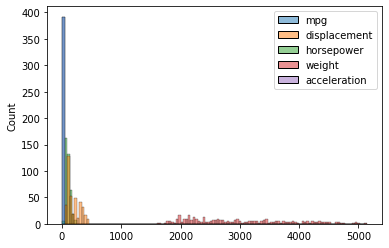

In [60]:

# Histogram
sns.histplot(df_nums)

<AxesSubplot:xlabel='mpg', ylabel='Count'>

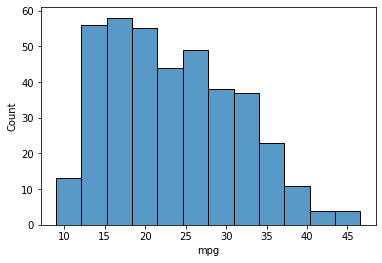

In [61]:
#lets check one coulmn at a time
sns.histplot(df_nums["mpg"])

<AxesSubplot:xlabel='displacement', ylabel='Count'>

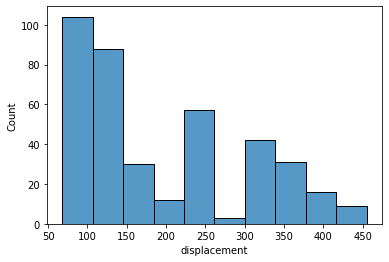

In [62]:
sns.histplot(df_nums["displacement"])

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

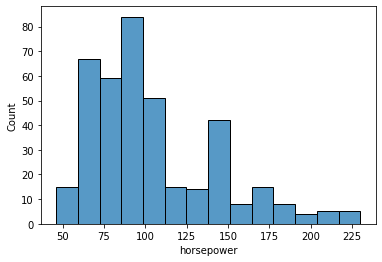

In [63]:
sns.histplot(df_nums["horsepower"])

<AxesSubplot:xlabel='weight', ylabel='Count'>

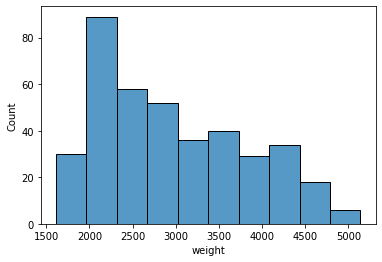

In [64]:
sns.histplot(df_nums["weight"])

<AxesSubplot:xlabel='acceleration', ylabel='Count'>

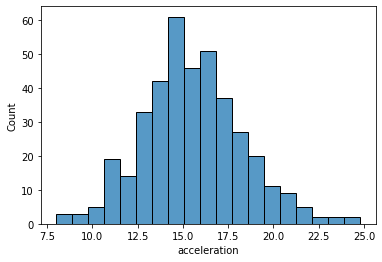

In [65]:
sns.histplot(df_nums["acceleration"])

> By visualizing normality we can give general idea that
>  
> acceleration is quite normal than others.

# 2.Check normality by statistical test

In [66]:
# shapiro wilk test
# import library
from scipy.stats import shapiro

In [67]:
# Shapiro wilk test
stat,p=shapiro(df_nums['mpg'])
print("stat=%.3f" % stat) #Replace , with % to get ans upto 3 decimal digits
print("p=%.3f" % p)


if  p > 0.05: 
    print("data is normal")
else:
    print("data is not normal")  

stat=0.967
p=0.000
data is not normal


In [68]:
# Shapiro wilk test
stat,p=shapiro(df_nums['displacement'])
print("stat=%.3f" % stat) #Replace , with % to get ans upto 3 decimal digits
print("p=%.3f" % p)


if  p > 0.05: 
    print("data is normal")
else:
    print("data is not normal") 

stat=0.882
p=0.000
data is not normal


In [69]:
# Shapiro wilk test
stat,p=shapiro(df_nums['horsepower'])
print("stat=%.3f" % stat) #Replace , with % to get ans upto 3 decimal digits
print("p=%.3f" % p)


if  p > 0.05: 
    print("data is normal")
else:
    print("data is not normal") 

stat=0.904
p=0.000
data is not normal


In [70]:
# Shapiro wilk test
stat,p=shapiro(df_nums[ 'weight'])
print("stat=%.3f" % stat) #Replace , with % to get ans upto 3 decimal digits
print("p=%.3f" % p)


if  p > 0.05: 
    print("data is normal")
else:
    print("data is not normal") 

stat=0.941
p=0.000
data is not normal


In [71]:
# Shapiro wilk test
stat,p=shapiro(df_nums['acceleration'])
print("stat=%.3f" % stat) #Replace , with % to get ans upto 3 decimal digits
print("p=%.3f" % p)


if  p > 0.05: 
    print("data is normal")
else:
    print("data is not normal") 

stat=0.992
p=0.031
data is not normal


> As shpairo test shows that no Column has Gaussian/Normal distribution.

# Supervised Machine Learning 
## 1.Simple linear Regression

In [72]:
# numerical variables are stored in df_nums
df_nums

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5
...,...,...,...,...,...
387,27.0,140.0,86.0,2790,15.6
388,44.0,97.0,52.0,2130,24.6
389,32.0,135.0,84.0,2295,11.6
390,28.0,120.0,79.0,2625,18.6


In [73]:
# splitting data into X,y
df_nums1=df_nums[["horsepower","weight"]]
df_nums1

,horsepower,weight
0,130.0,3504
1,165.0,3693
2,150.0,3436
3,150.0,3433
4,140.0,3449
...,...,...
387,86.0,2790
388,52.0,2130
389,84.0,2295
390,79.0,2625


In [74]:
# Simple feature scaling
#1- x(new)=x(old)/x(max) 
df_nums1["horsepower"]=df_nums1["horsepower"]/df_nums1["horsepower"].max()
df_nums1["weight"]=df_nums1["weight"]/df_nums1["weight"].max()
df_nums1.head()

C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Temp\ipykernel_4544\239327204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nums1["horsepower"]=df_nums1["horsepower"]/df_nums1["horsepower"].max()
C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Temp\ipykernel_4544\239327204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nums1["weight"]=df_nums1["weight"]/df_nums1["weight"].max()


,horsepower,weight
0,0.565217,0.681712
1,0.717391,0.718482
2,0.652174,0.668482
3,0.652174,0.667899
4,0.608696,0.671012


In [75]:
# splitting data into X,y
X =df_nums1[["horsepower"]]
y = df_nums1["weight"]

In [76]:
#importing linearRegression model
from sklearn.linear_model import LinearRegression
#importing train_test_split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
# toring in model
model=LinearRegression()
# fitting the model
model=model.fit(X_train,y_train)

C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


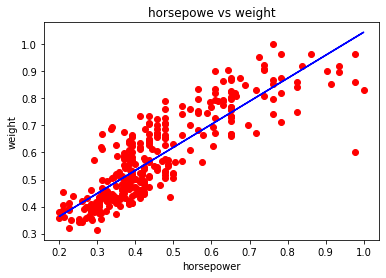

In [77]:
# Visualizing the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train.values, model.predict(X_train.values), color='blue')
plt.title('horsepowe vs weight')
plt.xlabel("horsepower")
plt.ylabel('weight')
plt.show()

C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


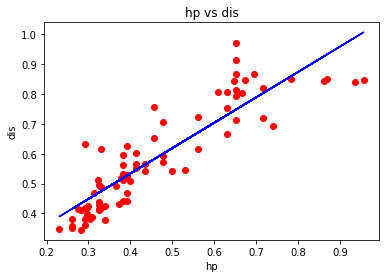

In [78]:
# Visualizing the Testing set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test.values, model.predict(X_test.values), color='blue')
plt.title('hp vs dis')
plt.xlabel("hp")
plt.ylabel('dis')
plt.show()

In [79]:
# score
score1=model.score(X_test,y_test)
score2=model.score(X_train,y_train)
print("score of testing model=",score1)
print("score of training model=",score2)

score of testing model= 0.7958581641157505
score of training model= 0.7338875397200653


In [80]:
# Prediction of a particular value and multiple values
y_pred1 =model.predict([[0.608696]])
y_pred3=model.predict([[0.608696],[0.646739],[0.510870]])

print("prediction of one value=",y_pred1)
print("prediction of more than one value=",y_pred3)

prediction of one value= [0.71133289]
prediction of more than one value= [0.71133289 0.74368516 0.62814034]


C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 1a. Multiple linear regression

In [158]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
indices = (0, 1)

X_train = X[:-20, indices]
X_test = X[-20:, indices]
y_train = y[:-20]
y_test = y[-20:]

ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Temp\ipykernel_4544\3281178735.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=elev, azim=azim)
C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Temp\ipykernel_4544\3281178735.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=elev, azim=azim)
C:\Users\mohsin.DESKTOP-7I5HD4K\AppDat

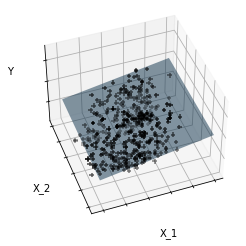

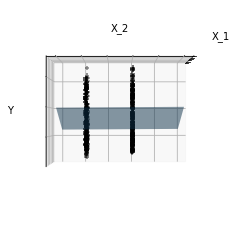

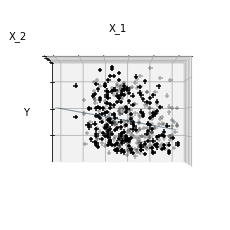

In [159]:
# Plot the figure
def plot_figs(fig_num, elev, azim, X_train, clf):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c="k", marker="+")
    ax.plot_surface(
        np.array([[-0.1, -0.1], [0.15, 0.15]]),
        np.array([[-0.1, 0.15], [-0.1, 0.15]]),
        clf.predict(
            np.array([[-0.1, -0.1, 0.15, 0.15], [-0.1, 0.15, -0.1, 0.15]]).T
        ).reshape((2, 2)),
        alpha=0.5,
    )
    ax.set_xlabel("X_1")
    ax.set_ylabel("X_2")
    ax.set_zlabel("Y")
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])


# Generate the three different figures from different views
elev = 43.5
azim = -110
plot_figs(1, elev, azim, X_train, ols)

elev = -0.5
azim = 0
plot_figs(2, elev, azim, X_train, ols)

elev = -0.5
azim = 90
plot_figs(3, elev, azim, X_train, ols)

plt.show()

## 1b. Polynomial regression

In [123]:
# Importing the dataset
datas = pd.read_csv('data.csv')
datas

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [124]:
X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values

In [125]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
 
lin.fit(X, y)

LinearRegression()

In [126]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

Text(0, 0.5, 'Pressure')

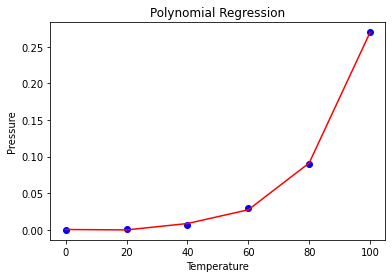

In [128]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')
 
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

In [130]:
# Predicting a new result with Linear Regression after converting predict variable to 2D array
pred = 110.0
predarray = np.array([[pred]])
lin.predict(predarray)

array([0.20675333])

In [131]:
# Predicting a new result with Polynomial Regression after converting predict variable to 2D array
pred2 = 110.0
pred2array = np.array([[pred2]])
lin2.predict(poly.fit_transform(pred2array))

array([0.43295877])

## 1c. Logistic regression

In [134]:
dataset=pd.read_csv("User_Data.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [141]:
# input
X = dataset.iloc[:, [2, 3]].values
# output
y = dataset.iloc[:, 4].values

In [153]:
#  import train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.25, random_state = 0)

In [154]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
 
print (X_train[0:10, :])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [157]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [156]:
# y_predict
y_pred = classifier.predict(X_test)

In [147]:
# confusion metrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[65  3]
 [ 8 24]]


In [148]:
# accuracy score
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.89


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


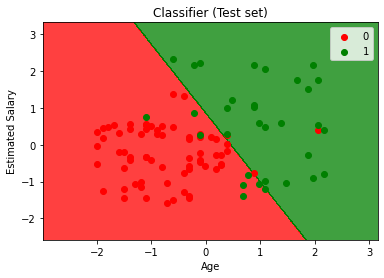

In [150]:
# visualization
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
     
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 2. Decission tree Classifier

In [85]:
# extract car company from `name`
df_cat['car_company'] = df_cat['name'].apply(lambda x: x.split()[0])

# remove car company from `name` and rename to `car_name`
df_cat['car_name'] = df_cat['name'].apply(lambda x: ' '.join(x.split()[1:]))
df_cat.drop('name', axis=1, inplace=True)

cats.extend(['car_company', 'car_name'])
cats.remove('name')

print("categorical variables:", cats)
df_cat.head()

categorical variables: ['origin', 'cylinders', 'model_year', 'car_company', 'car_name']


,origin,cylinders,model_year,car_company,car_name
0,usa,8,70,chevrolet,chevelle malibu
1,usa,8,70,buick,skylark 320
2,usa,8,70,plymouth,satellite
3,usa,8,70,amc,rebel sst
4,usa,8,70,ford,torino


In [86]:
# updating df
df = pd.concat((df_cat, df_nums), axis=1)

In [88]:
# defining input and target 
X=df[["horsepower","displacement"]]
y=df["car_company"]

In [89]:
#importing linearRegression model
from sklearn.tree  import DecisionTreeClassifier
#importing train_test_split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
# # storing in model
model=DecisionTreeClassifier()
# fitting the model
model=model.fit(X_train,y_train)

In [90]:
# prediction
y_pred=model.predict(X_test)
y_pred

array(['toyota', 'ford', 'buick', 'plymouth', 'subaru', 'amc', 'toyota',
       'peugeot', 'chevrolet', 'datsun', 'volkswagen', 'oldsmobile',
       'ford', 'chevrolet', 'buick', 'honda', 'saab', 'plymouth', 'audi',
       'chevrolet', 'ford', 'amc', 'chevrolet', 'chevrolet', 'dodge',
       'chevrolet', 'chrysler', 'ford', 'amc', 'amc', 'datsun', 'ford',
       'ford', 'datsun', 'buick', 'triumph', 'toyota', 'chevrolet',
       'plymouth', 'chrysler', 'chevrolet', 'honda', 'ford', 'ford',
       'opel', 'ford', 'dodge', 'chevrolet', 'chevrolet', 'amc', 'opel',
       'plymouth', 'chevrolet', 'chevrolet', 'opel', 'peugeot', 'ford',
       'chevrolet', 'honda', 'ford', 'chevrolet', 'toyota', 'vw',
       'mercury', 'subaru', 'chevrolet', 'chrysler', 'chevrolet',
       'pontiac', 'datsun', 'honda', 'honda', 'ford', 'dodge',
       'chevrolet', 'ford', 'fiat', 'chevrolet', 'honda'], dtype=object)

In [91]:
from sklearn.metrics import accuracy_score
# checking accuracy
#y_test=actual value
accuracy_score(y_test,y_pred)

0.5063291139240507

## 3.RFM Regressor

In [92]:
# split dataset into X,y
X=df[['displacement','horsepower','weight']]
y=df['mpg']

In [93]:
#importing linearRegression model
from sklearn.ensemble import RandomForestRegressor
#importing train_test_split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
# # storing in model
model=RandomForestRegressor(n_estimators=100).fit(X_train,y_train)
# fitting the model
model=model.fit(X_train,y_train)

In [94]:
#prediction
y_pred=model.predict(X_test)
y_pred

array([29.126, 26.112, 13.37 , 35.654, 34.027, 19.881, 32.424, 28.626,
       20.11 , 27.64 , 31.733, 12.545, 26.811, 13.495, 13.6  , 34.573,
       23.986, 14.465, 27.054, 28.323, 18.08 , 18.247, 28.072, 19.642,
       29.656, 13.985, 26.635, 26.395, 19.472, 14.425, 25.778, 29.01 ,
       27.87 , 32.749, 20.613, 26.93 , 34.042, 15.085, 14.545, 13.56 ,
       13.777, 33.088, 28.026, 14.794, 31.944, 14.315, 28.092, 14.465,
       14.733, 20.3  , 28.201, 15.413, 11.095, 23.865, 29.56 , 26.043,
       21.074, 16.834, 32.953, 23.785, 20.436, 30.016, 31.718, 13.84 ,
       31.646, 16.342, 14.095, 28.824, 27.95 , 41.731, 33.972, 30.833,
       17.291, 14.96 , 19.926, 14.365, 31.588, 16.637, 33.493])

In [95]:
#Importing r2_score
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)
#Importing explained_variance_score 
from sklearn.metrics import explained_variance_score
expalined_variance_score=explained_variance_score(y_test,y_pred)
# d2_tweedie_score
from sklearn.metrics import d2_tweedie_score
d2_tweedie_score=d2_tweedie_score(y_test, y_pred)

print("r2_score =",r2_score)
print("expalined_variance_score =",expalined_variance_score)
print("d2_tweedie_score =",d2_tweedie_score)

r2_score = 0.7948208554779994
expalined_variance_score = 0.7958077520604451
d2_tweedie_score = 0.7948208554779994


## 3a. RFM Classifier

In [96]:
# split dataset into X,y
X=df[["displacement","horsepower"]]
y=df['car_company']

In [97]:
#importing linearRegression model
from sklearn.ensemble import RandomForestClassifier
#importing train_test_split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
# # storing in model
model=RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
# fitting the model
model=model.fit(X_train,y_train)

In [98]:
#prediction
y_pred=model.predict(X_test)
y_pred

array(['toyota', 'ford', 'buick', 'plymouth', 'subaru', 'amc',
       'vokswagen', 'peugeot', 'chevrolet', 'datsun', 'volkswagen',
       'oldsmobile', 'ford', 'chevrolet', 'buick', 'honda', 'saab',
       'plymouth', 'audi', 'pontiac', 'mercury', 'amc', 'chevrolet',
       'chevrolet', 'dodge', 'chevrolet', 'chrysler', 'ford', 'amc',
       'amc', 'volvo', 'ford', 'opel', 'datsun', 'buick', 'chevrolet',
       'toyota', 'chevrolet', 'plymouth', 'buick', 'chevrolet', 'honda',
       'opel', 'ford', 'volkswagen', 'ford', 'dodge', 'chevrolet',
       'chevrolet', 'amc', 'opel', 'ford', 'hi', 'ford', 'volkswagen',
       'chevrolet', 'ford', 'chevrolet', 'honda', 'ford', 'chevrolet',
       'toyota', 'vw', 'mercury', 'subaru', 'chevrolet', 'chrysler',
       'chevrolet', 'chevrolet', 'datsun', 'honda', 'honda', 'mercury',
       'dodge', 'chevrolet', 'ford', 'fiat', 'chevrolet', 'honda'],
      dtype=object)

In [99]:
#Importing r2_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.46835443037974683

## 4. K-NN

In [100]:
df["origin"]=df["origin"].replace("usa",0)
df["origin"]=df["origin"].replace("japan",1)
df["origin"]=df["origin"].replace("europe",2)

In [101]:
# splitting into X,y
X=df[['horsepower','origin']]
y=df['car_company']

In [102]:
#importing linearRegression model
from sklearn.neighbors import KNeighborsClassifier 
#importing train_test_split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
# # storing in model
model=KNeighborsClassifier(n_neighbors=5)
# fitting the model
model=model.fit(X_train,y_train)

In [103]:
#Importing r2_score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.46835443037974683

In [104]:
#Importing r2_score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.46835443037974683

## 5. Naive Bayes

In [105]:
#Loading dataset
phool=sns.load_dataset("iris")
phool.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [106]:
# split dataset into X,y
X=phool.iloc[:,:-1]
y=phool.iloc[:,-1:]

In [107]:
# Importing ML algorithm to be used
from sklearn.naive_bayes import GaussianNB
model=GaussianNB().fit(X,y)

C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
# Importing library
from sklearn.model_selection import train_test_split
# import train test split
X_train,X_test, y_train,y_test =train_test_split(X,y, test_size=1/5,random_state=0)
# storing in model
model=GaussianNB().fit(X_train,y_train)
#prediction
y_pred=model.predict(X_test)
y_pred

C:\Users\mohsin.DESKTOP-7I5HD4K\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa'], dtype='<U10')

In [109]:
#Importing accuracy_score fro metrics
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print("Gaussian naive bayes model accuracy(in %):",accuracy_score(y_test,y_pred)*100)

Gaussian naive bayes model accuracy(in %): 96.66666666666667


In [110]:
#Confusion metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

Text(0.5, 1.0, 'Gaussian naive bayes model accuracy(in %):96.66666666666667')

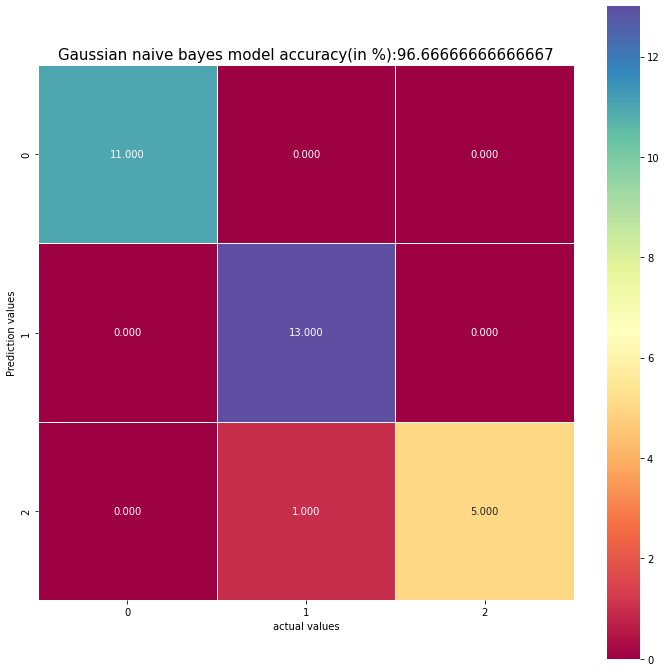

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True,fmt="0.3f", linewidths=.5, square=True, cmap='Spectral' )
plt.xlabel("actual values")
plt.ylabel("Prediction values")
all_sample_tittle="Gaussian naive bayes model accuracy(in %):{0}".format(score*100)

plt.title(all_sample_tittle, size=15)

## 6. SVM( support vector machine)
> without probability

In [112]:
#load dataset
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()


In [113]:
#Print names of features
print("features:" , cancer.feature_names)
#Print the label types of cancer( malignant, benign)
print("labels:" , cancer.target_names)

features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
labels: ['malignant' 'benign']


In [114]:
#check shape of cancer(features)
cancer.data.shape

(569, 30)

In [115]:
#print cancer data features of top 5 records
# yahan pr hm head ke command nae den ge bcz
# nd.array mn head ke comand nae hti
cancer.data[0:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [116]:
# print cancer(targets)
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [117]:
# Importing library
from sklearn.model_selection import train_test_split
# Importing train test split
X_train,X_test, y_train,y_test =train_test_split(cancer.data,cancer.target, test_size=1/5,random_state=109)


In [118]:
# Import SVC(support vector classifier)
from sklearn.svm import SVC
# storing in clf
clf=SVC(kernel="linear") # Linear kernel
# Train the model using the training sets
clf.fit(X_train,y_train)
# Predict
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1])

In [119]:
#Importing accuracy_score from metrics
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
#Model accuracy:how often the model is correct?
print("Accuracy",score)

Accuracy 0.956140350877193


In [ ]:
from sklearn.metrics import precision_score
score=precision_score(y_test,y_pred)
#Model accuracy:how often the model is correct?
print("precision_score",score)

precision_score 0.9859154929577465


In [120]:
from sklearn.metrics import recall_score
score=recall_score(y_test,y_pred)
#Model accuracy:how often the model is correct?
print("recall_score",score)

recall_score 0.9459459459459459


In [121]:
#Confusion metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[39,  1],
       [ 4, 70]], dtype=int64)

Text(0.5, 1.0, 'SVM model accuracy(in %):94.5945945945946')

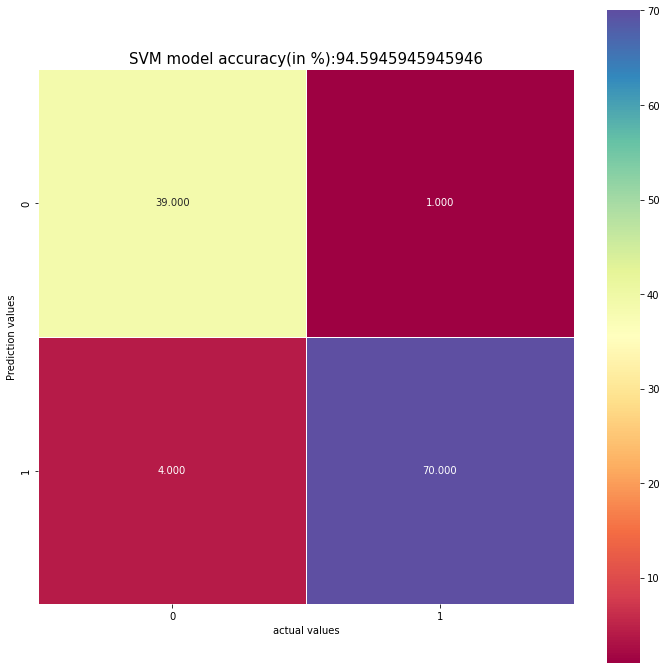

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True,fmt="0.3f", linewidths=.5, square=True, cmap='Spectral' )
plt.xlabel("actual values")
plt.ylabel("Prediction values")
all_sample_tittle="SVM model accuracy(in %):{0}".format(score*100)

plt.title(all_sample_tittle, size=15)